<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [66]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-09 09:20:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  69.6MB/s    in 2.9s    

2025-03-09 09:20:07 (69.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [67]:
!pip install pandas
!pip install seaborn
!pip install numpy

In [68]:
!pip install matplotlib

In [69]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Connect to the SQLite database


In [70]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [71]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [72]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

**Demo 3: Group data by age**


In [73]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


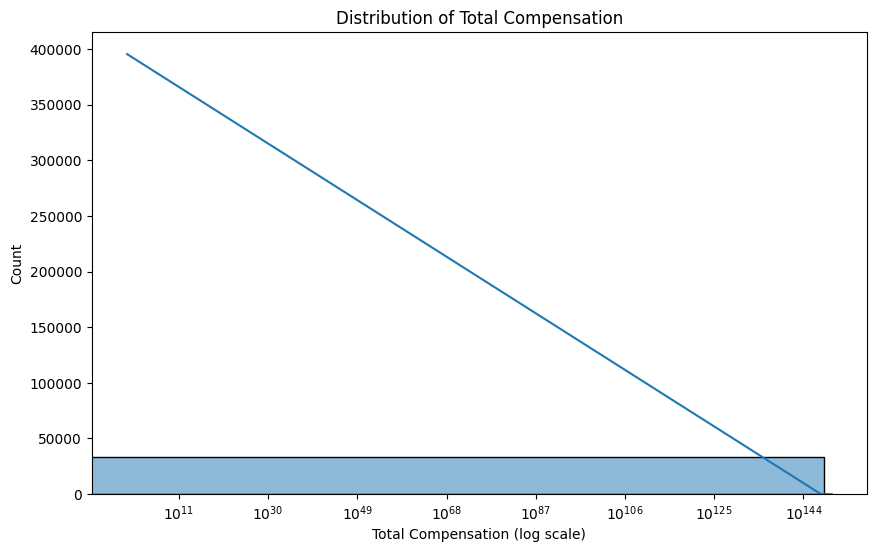

In [74]:
QUERY = "SELECT CompTotal FROM main"
df_Comp_Total = pd.read_sql_query(QUERY, conn)

# Drop missing or zero values in CompTotal
df_Comp_Total = df_Comp_Total[df_Comp_Total["CompTotal"].notna() & (df_Comp_Total["CompTotal"] > 0)]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_Comp_Total["CompTotal"], bins=50, kde=True)
plt.xscale("log")  # Using log scale for better visualization
plt.xlabel("Total Compensation (log scale)")
plt.ylabel("Count")
plt.title("Distribution of Total Compensation")
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [75]:
QUERY = "SELECT YearsCodePro FROM main"
df_years_pro = pd.read_sql_query(QUERY, conn)
df_years_pro

YearsCodePro
0             None
1               17
2               27
3             None
4             None
...            ...
65432            3
65433         None
65434            5
65435            2
65436         None

[65437 rows x 1 columns]

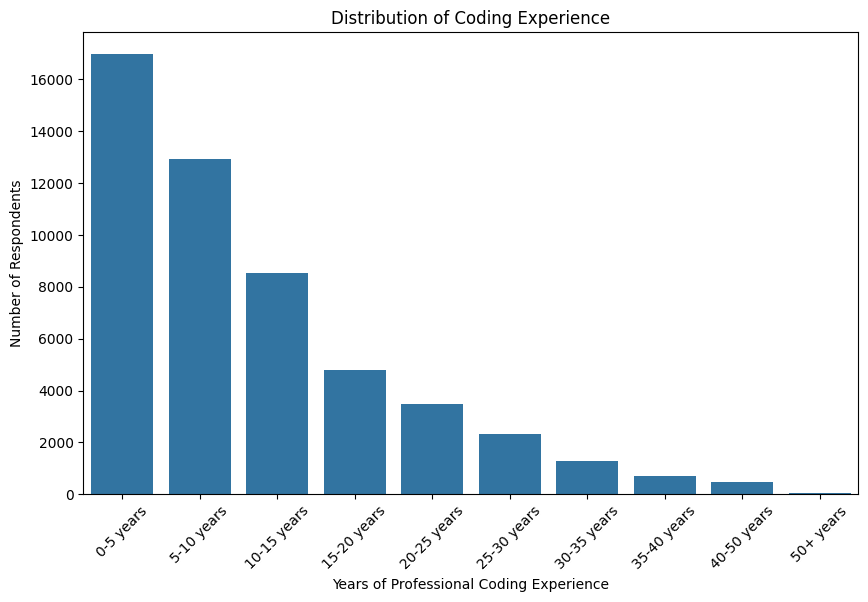

In [76]:

# Convert categorical experience values to numeric
mapping = {
    "Less than 1 year": 0,
    "More than 50 years": 51
}
df_years_pro["YearsCodePro"] = df_years_pro["YearsCodePro"].replace(mapping)
df_years_pro["YearsCodePro"] = pd.to_numeric(df_years_pro["YearsCodePro"], errors="coerce")  # Convert to numeric
type(df_years_pro)

# Define a function to map numeric values to string categories
def map_experience(years):
    if pd.isna(years):
        return "Unknown"
    elif years < 5:
        return "0-5 years"
    elif years < 10:
        return "5-10 years"
    elif years < 15:
        return "10-15 years"
    elif years < 20:
        return "15-20 years"
    elif years < 25:
        return "20-25 years"
    elif years < 30:
        return "25-30 years"
    elif years < 35:
        return "30-35 years"
    elif years < 40:
        return "35-40 years"
    elif years < 50:
        return "40-50 years"
    else:
        return "50+ years"

# Apply mapping function
df_years_pro["YearsCodePro"] = df_years_pro["YearsCodePro"].apply(map_experience)

# Define custom order for plotting
order = ["0-5 years", "5-10 years", "10-15 years", "15-20 years", "20-25 years", 
         "25-30 years", "30-35 years", "35-40 years", "40-50 years", "50+ years"]

# Plot histogram using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_years_pro, x="YearsCodePro", order=order)
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Coding Experience")
plt.xticks(rotation=45)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


<Figure size 1000x600 with 0 Axes>

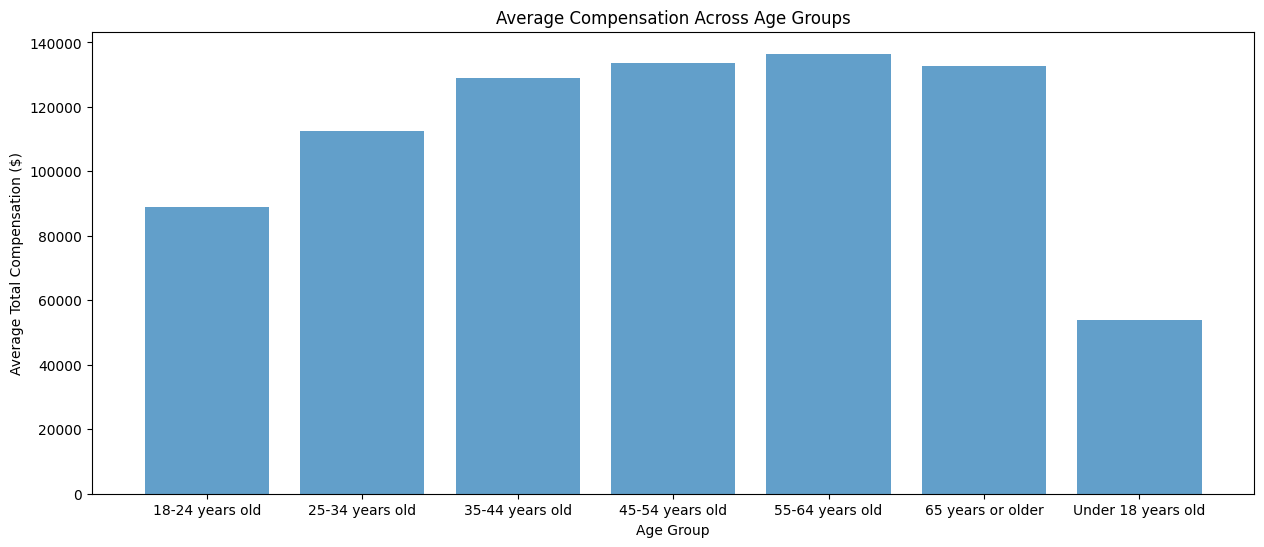

In [77]:
QUERY = "SELECT Age,CompTotal FROM main"

df = pd.read_sql_query(QUERY, conn)

# Calculate the IQR for 'CompTotal'
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

df = df.groupby('Age')['CompTotal'].mean().reset_index()
df = df[df['Age'] != 'Prefer not to say']

# Plot a simple histogram of 'CompTotal' grouped by 'AgeGroup'
plt.figure(figsize=(10, 6))

# Plot histogram by Age
"""plt.hist([df[df['Age'] == label]['CompTotal'] for label in df['Age'].unique()],
         bins=10, 
         alpha=0.6, 
         label=df['Age'].unique())

# Add labels and title
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.title("Distribution of Compensation Across Age Groups")
plt.legend(title="Age Group")

# Show the plot
plt.show()"""


# Step 3: Plot a bar chart
plt.figure(figsize=(15, 6))
plt.bar(df['Age'], df['CompTotal'], alpha=0.7)

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Average Total Compensation ($)')
plt.title('Average Compensation Across Age Groups')

# Show the plot
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [78]:
QUERY = "SELECT Age,TimeSearching FROM main"
df = pd.read_sql_query(QUERY, conn)
df = df.dropna()

/tmp/ipykernel_300/2343530627.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["TimeSearching"] = df["TimeSearching"].replace(mapping)
/tmp/ipykernel_300/2343530627.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='TimeSearching', data=df, palette='viridis')


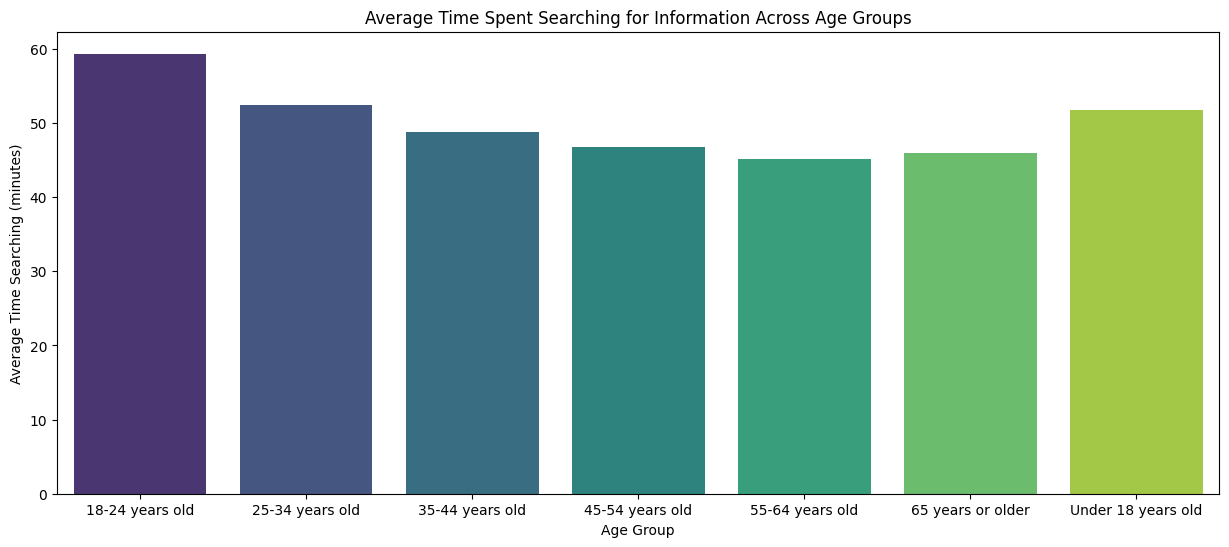

In [79]:
#Mapping TimeSearching

mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day":90,
    "Over 120 minutes a day": 150
}
df["TimeSearching"] = df["TimeSearching"].replace(mapping)
df = df.groupby('Age')['TimeSearching'].mean().reset_index()
df = df[df['Age'] != "Prefer not to say"]

# Step 3: Plot a bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='Age', y='TimeSearching', data=df, palette='viridis')

# Customize the plot
plt.title('Average Time Spent Searching for Information Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Time Searching (minutes)')

# Show the plot
plt.show()


### 3. Visualizing the Composition of Data

**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [80]:
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(QUERY, conn)
df = df.dropna()

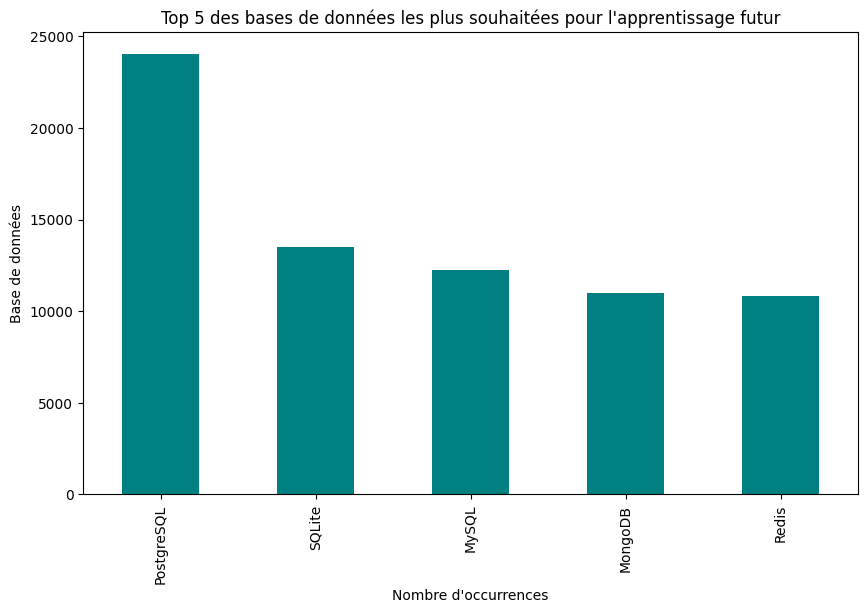

In [81]:

# Étape 1 : Séparer la colonne 'DatabaseWantToWorkWith' par des points-virgules et l'exploser
all_databases = df['DatabaseWantToWorkWith'].str.split(';').explode()

# Étape 2 : Appliquer un count pour obtenir les occurrences de chaque base de données
database_counts = all_databases.value_counts()

# Étape 3 : Obtenir les 5 bases de données les plus fréquentes
top_databases = database_counts.head(5)

# Étape 4 : Afficher un graphique à barres horizontal pour les 5 bases de données les plus fréquentes
plt.figure(figsize=(10, 6))
top_databases.plot(kind='bar', color='teal')

# Personnaliser le graphique
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Base de données')
plt.title('Top 5 des bases de données les plus souhaitées pour l\'apprentissage futur')

# Afficher le graphique
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [82]:
QUERY = "SELECT RemoteWork FROM main"
df = pd.read_sql_query(QUERY, conn)
df = df.dropna()


RemoteWork                          
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


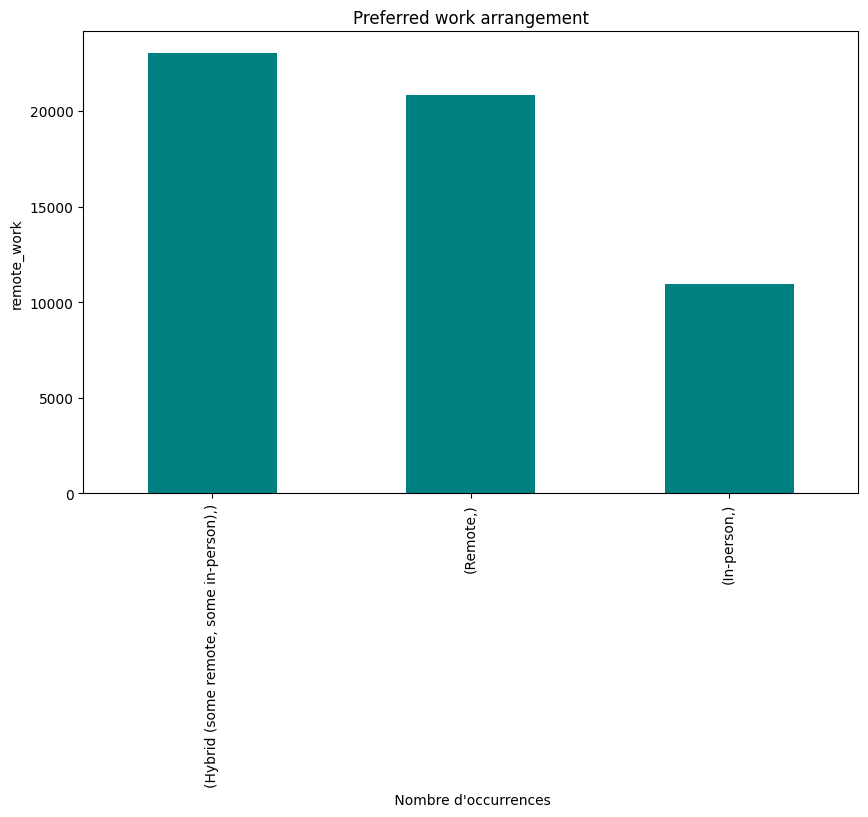

In [83]:
# Étape 2 : Appliquer un count pour obtenir les occurrences
remote_work = df.value_counts()
print(remote_work)
plt.figure(figsize=(10, 6))
remote_work.plot(kind='bar', color='teal')

# Personnaliser le graphique
plt.xlabel(' Nombre d\'occurrences')
plt.ylabel('remote_work')
plt.title('Preferred work arrangement')

# Afficher le graphique
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


<Figure size 1000x600 with 0 Axes>

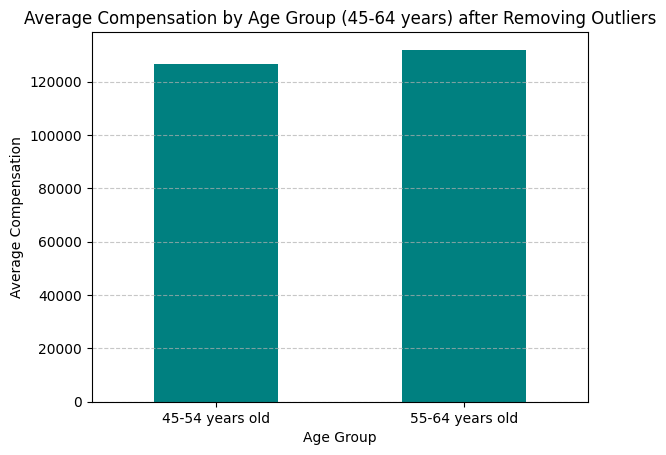

In [84]:
QUERY = "SELECT Age,CompTotal FROM main"

df = pd.read_sql_query(QUERY, conn)
df = df.dropna()

# Filter for the age groups 45-54 and 55-64
df_filtered = df[df['Age'].isin(['45-54 years old', '55-64 years old'])]

# Apply IQR method to remove outliers
Q1 = df_filtered['CompTotal'].quantile(0.25)
Q3 = df_filtered['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df_filtered[(df_filtered['CompTotal'] >= lower_bound) & (df_filtered['CompTotal'] <= upper_bound)]

# Group by Age and compute mean compensation
df_grouped = df_filtered.groupby('Age')['CompTotal'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
df_grouped.set_index('Age').plot(kind='bar', color='teal', legend=False)

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Average Compensation')
plt.title('Average Compensation by Age Group (45-64 years) after Removing Outliers')
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [85]:
QUERY = "SELECT YearsCodePro,JobSat FROM main"
df_years_pro = pd.read_sql_query(QUERY, conn)
df_years_pro = df_years_pro.dropna()

In [86]:
# Convert categorical experience values to numeric
mapping = {
    "Less than 1 year": 0,
    "More than 50 years": 51
}
df_years_pro["YearsCodePro"] = df_years_pro["YearsCodePro"].replace(mapping)
df_years_pro["YearsCodePro"] = pd.to_numeric(df_years_pro["YearsCodePro"], errors="coerce")  # Convert to numeric

In [87]:
# Define bins and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60]  # Define bin edges
labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-50", "50+"]  # Labels for bins

# Apply binning
df_years_pro["YearsCodePro"] = pd.cut(df_years_pro["YearsCodePro"], bins=bins, labels=labels, right=True,include_lowest=True)  # Ensures 0 is included in the first bin)

/tmp/ipykernel_300/2918101397.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_years_pro = df_years_pro.groupby("YearsCodePro")["JobSat"].mean().reset_index()


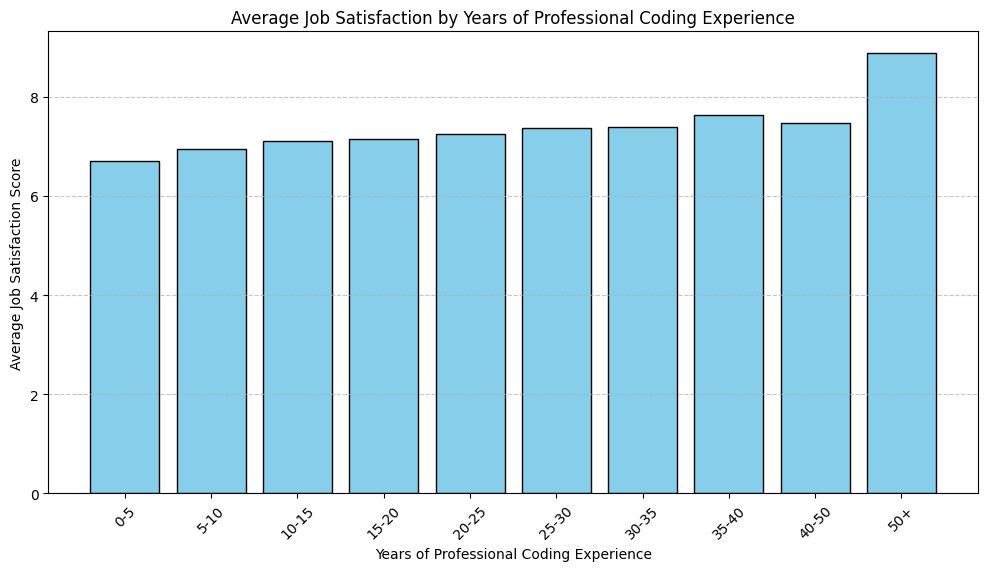

In [89]:
# Group by Experience Range and calculate the mean JobSat score for each group
df_years_pro = df_years_pro.groupby("YearsCodePro")["JobSat"].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_years_pro["YearsCodePro"], df_years_pro["JobSat"], color="skyblue", edgecolor="black")

# Customize the plot
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Average Job Satisfaction Score")
plt.title("Average Job Satisfaction by Years of Professional Coding Experience")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [90]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
